In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import os


2025-08-03 07:52:00.741255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754207521.097850      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754207521.195568      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:

from collections import Counter


Tomato_Late_blight: 152
Pepper__bell___healthy: 1
Tomato_healthy: 1
Pepper__bell___Bacterial_spot: 0
Potato___Early_blight: 0
Potato___Late_blight: 0
Potato___healthy: 0
Tomato_Bacterial_spot: 0
Tomato_Early_blight: 0
Tomato_Leaf_Mold: 0


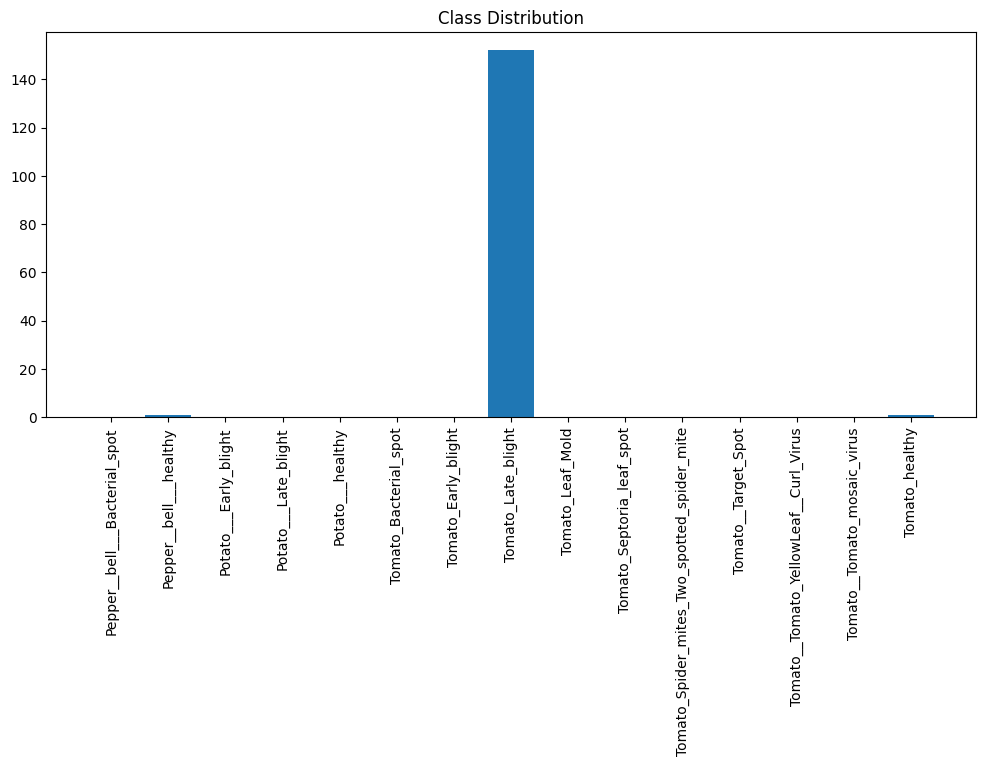

In [5]:
from pathlib import Path

data_dir = Path('/kaggle/input/plantdisease/PlantVillage')
classes = sorted([d.name for d in data_dir.iterdir() if d.is_dir()])

class_counts = {cls: len(list((data_dir / cls).glob("*.jpg"))) for cls in classes}

# Show top 10
sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
for cls, count in sorted_counts[:10]:
    print(f"{cls}: {count}")

# Plot
plt.figure(figsize=(12,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Class Distribution")
plt.show()


In [6]:
train_gen = train_datagen.flow_from_directory(
    '/kaggle/input/plantdisease/PlantVillage',  # replace XXX with actual folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 16516 images belonging to 15 classes.


In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Freeze base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


I0000 00:00:1754208040.621435      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754208040.622226      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,116,111 (92.00 MB)

 Trainable params: 528,399 (2.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)

# Training set
train_gen = train_datagen.flow_from_directory(
    '/kaggle/input/plantdisease/PlantVillage',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation set
val_gen = train_datagen.flow_from_directory(
    '/kaggle/input/plantdisease/PlantVillage',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [10]:
callbacks = [
    EarlyStopping(patience=4, restore_best_weights=True),
    ReduceLROnPlateau(patience=2, factor=0.2)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1754208137.078722     114 service.cc:148] XLA service 0x7899140503c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754208137.080264     114 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1754208137.080285     114 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1754208138.683659     114 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/517 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.0469 - loss: 3.2266   

I0000 00:00:1754208144.449327     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


517/517 ━━━━━━━━━━━━━━━━━━━━ 390s 720ms/step - accuracy: 0.1545 - loss: 2.5722 - val_accuracy: 0.2164 - val_loss: 2.3718 - learning_rate: 0.0010
Epoch 2/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 237s 459ms/step - accuracy: 0.2039 - loss: 2.3662 - val_accuracy: 0.2208 - val_loss: 2.2920 - learning_rate: 0.0010
Epoch 3/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 232s 448ms/step - accuracy: 0.2346 - loss: 2.2939 - val_accuracy: 0.2717 - val_loss: 2.1682 - learning_rate: 0.0010
Epoch 4/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 228s 442ms/step - accuracy: 0.2719 - loss: 2.1884 - val_accuracy: 0.3171 - val_loss: 2.0588 - learning_rate: 0.0010
Epoch 5/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 233s 451ms/step - accuracy: 0.2968 - loss: 2.1188 - val_accuracy: 0.3426 - val_loss: 1.9901 - learning_rate: 0.0010
Epoch 6/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 229s 443ms/step - accuracy: 0.3101 - loss: 2.0677 - val_accuracy: 0.3292 - val_loss: 1.9625 - learning_rate: 0.0010
Epoch 7/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 229s 443ms/step - accuracy: 0.3290 

In [11]:
# Final evaluation
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc:.2%}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 47s 360ms/step - accuracy: 0.4394 - loss: 1.7146
Validation Accuracy: 44.10%


129/129 ━━━━━━━━━━━━━━━━━━━━ 54s 386ms/step
Classification Report:

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.03      0.02      0.02       199
                     Pepper__bell___healthy       0.06      0.06      0.06       295
                      Potato___Early_blight       0.06      0.10      0.08       200
                       Potato___Late_blight       0.04      0.03      0.03       200
                           Potato___healthy       0.00      0.00      0.00        30
                      Tomato_Bacterial_spot       0.11      0.20      0.14       425
                        Tomato_Early_blight       0.00      0.00      0.00       200
                         Tomato_Late_blight       0.10      0.01      0.01       381
                           Tomato_Leaf_Mold       0.00      0.00      0.00       190
                  Tomato_Septoria_leaf_spot       0.12      0.08      0.09       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


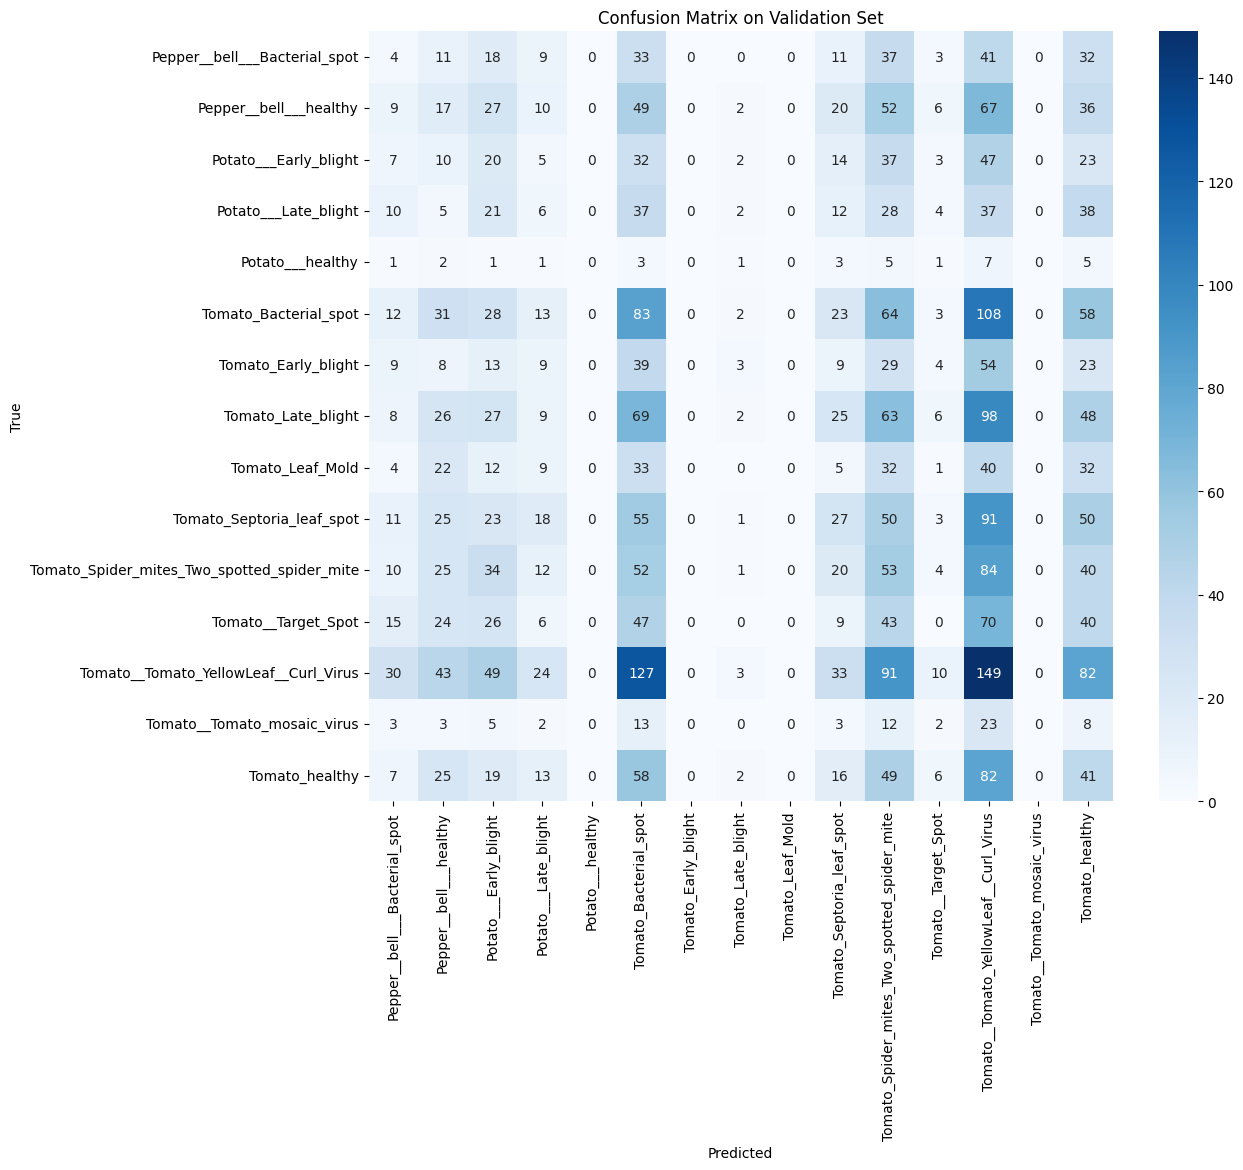

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on val_gen
val_gen.reset()
preds = model.predict(val_gen, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

# Class names
class_names = list(val_gen.class_indices.keys())

# Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix on Validation Set')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


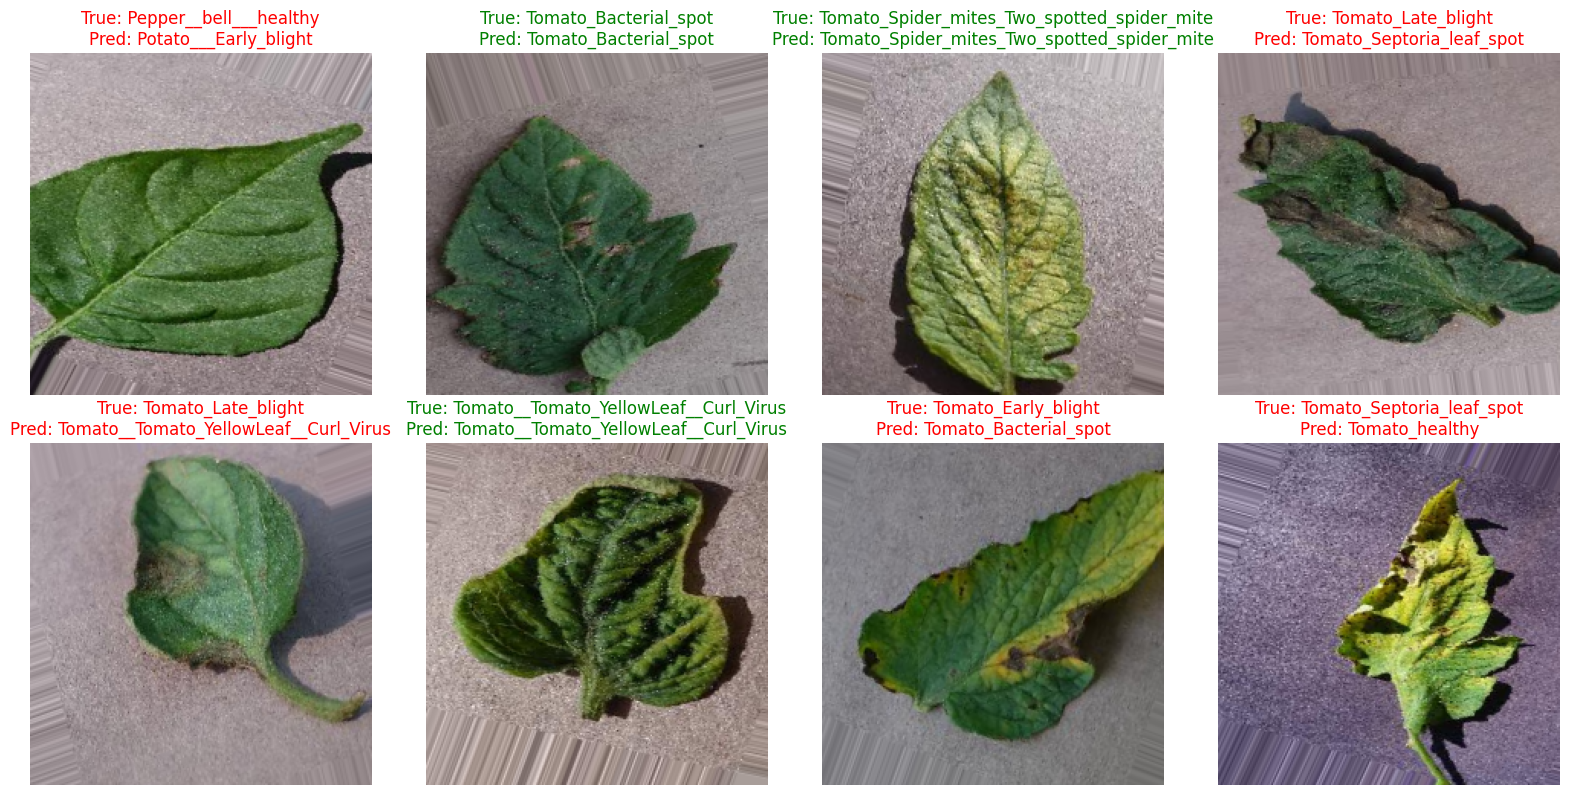

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Get class labels
class_names = list(val_gen.class_indices.keys())

# Reset the generator and get a batch
val_gen.reset()
x_batch, y_true_batch = next(val_gen)  # gets one batch of images (default 32)

# Predict on that batch
y_pred_probs = model.predict(x_batch)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_true_batch, axis=1)

# Show first 8 images with true and predicted labels
plt.figure(figsize=(16, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_batch[i])
    true_label = class_names[y_true_labels[i]]
    pred_label = class_names[y_pred_labels[i]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()


2025-08-04 11:20:43.596810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754306443.772955      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754306443.825276      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


I0000 00:00:1754306468.227718      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754306468.228522      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1754306487.007385     111 service.cc:148] XLA service 0x7d55cc001930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754306487.008424     111 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1754306487.008485     111 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1754306488.567762     111 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/517 ━━━━━━━━━━━━━━━━━━━━ 42s 82ms/step - accuracy: 0.0625 - loss: 4.2005   

I0000 00:00:1754306493.736950     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


517/517 ━━━━━━━━━━━━━━━━━━━━ 386s 714ms/step - accuracy: 0.0768 - loss: 2.8049 - val_accuracy: 0.0277 - val_loss: 2.7046
Epoch 2/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 238s 461ms/step - accuracy: 0.0986 - loss: 2.7019 - val_accuracy: 0.0328 - val_loss: 2.6599
Epoch 3/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 229s 444ms/step - accuracy: 0.1265 - loss: 2.6299 - val_accuracy: 0.0791 - val_loss: 2.5874
Epoch 4/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 232s 448ms/step - accuracy: 0.1382 - loss: 2.5953 - val_accuracy: 0.1929 - val_loss: 2.5280
Epoch 5/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 229s 443ms/step - accuracy: 0.1583 - loss: 2.5811 - val_accuracy: 0.2135 - val_loss: 2.5200
Epoch 6/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 229s 442ms/step - accuracy: 0.1817 - loss: 2.5176 - val_accuracy: 0.2448 - val_loss: 2.4843
Epoch 7/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 237s 459ms/step - accuracy: 0.1919 - loss: 2.4984 - val_accuracy: 0.2416 - val_loss: 2.4381
Epoch 8/15
517/517 ━━━━━━━━━━━━━━━━━━━━ 231s 447ms/step - accuracy: 0.2021 - loss: 2.48

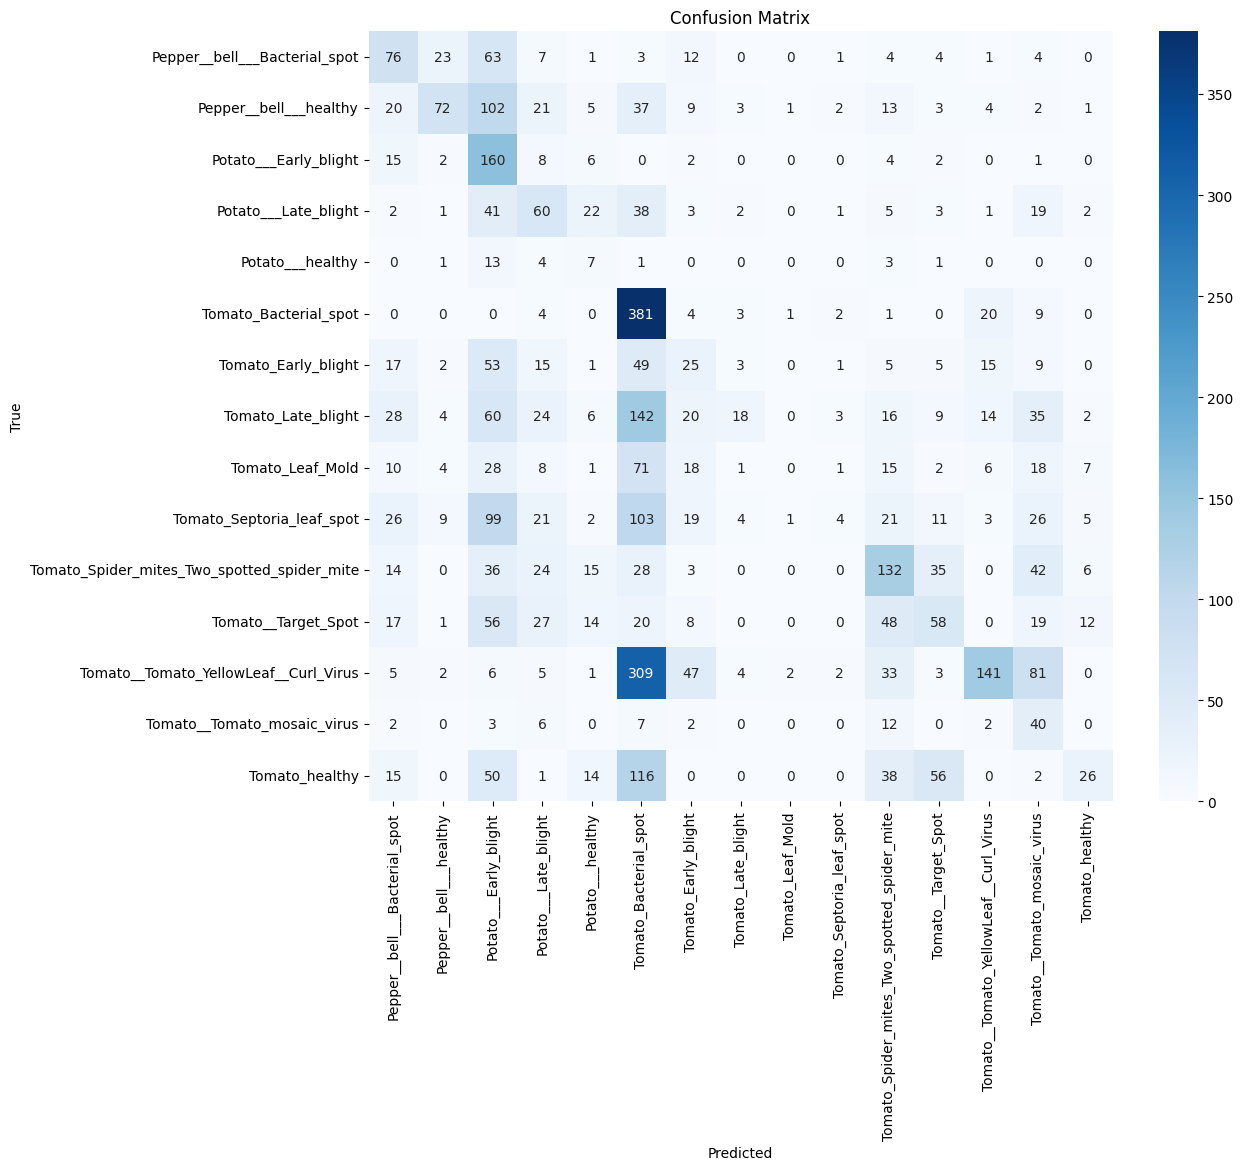

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


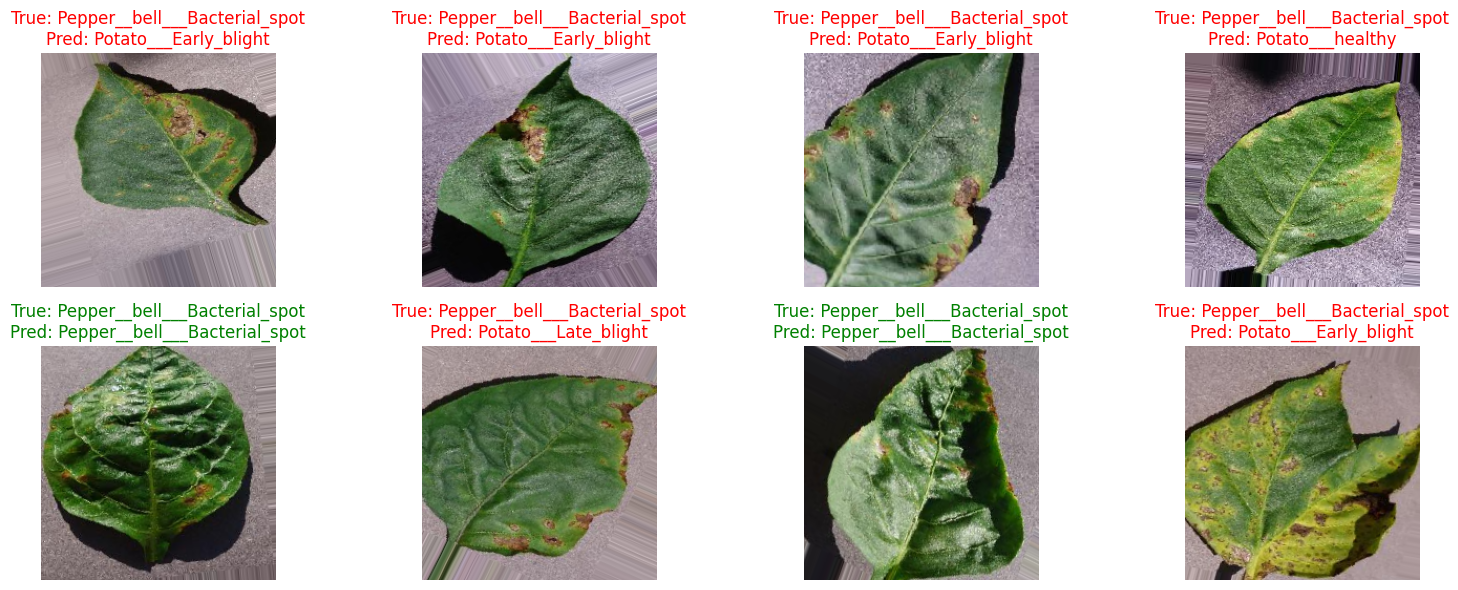

In [1]:
import os, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# === PARAMETERS ===
img_size = 224
batch_size = 32
epochs = 15
path = "/kaggle/input/plantdisease/PlantVillage"

# === DATA GENERATOR ===
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    path, target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='categorical', subset='training', shuffle=True
)
val_gen = datagen.flow_from_directory(
    path, target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='categorical', subset='validation', shuffle=False
)
class_names = list(train_gen.class_indices.keys())
num_classes = len(class_names)

# === CLASS WEIGHTS ===
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_gen.classes),
                                     y=train_gen.classes)
class_weights_dict = dict(enumerate(class_weights))

# === MODEL ===
base = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base.trainable = False
x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
out = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base.input, outputs=out)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# === TRAIN ===
stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_gen, validation_data=val_gen, epochs=epochs,
                    callbacks=[stop], class_weight=class_weights_dict)

# === EVALUATE ===
val_gen.reset()
y_true = val_gen.classes
y_pred = np.argmax(model.predict(val_gen), axis=1)
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names,
            yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()

# === VISUALIZE PREDICTIONS ===
x_batch, y_batch = next(val_gen)
y_true_batch = np.argmax(y_batch, axis=1)
y_pred_batch = np.argmax(model.predict(x_batch), axis=1)
plt.figure(figsize=(16, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_batch[i])
    true = class_names[y_true_batch[i]]
    pred = class_names[y_pred_batch[i]]
    plt.title(f"True: {true}\nPred: {pred}", color='green' if true==pred else 'red')
    plt.axis('off')
plt.tight_layout(); plt.show()


2025-08-05 09:38:24.098462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754386704.311293      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754386704.380645      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


I0000 00:00:1754386725.266864      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754386725.267660      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1754386734.801499     112 service.cc:148] XLA service 0x7fad7c002370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754386734.802631     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1754386734.802652     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1754386735.652850     112 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1754386767.798869     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


517/517 ━━━━━━━━━━━━━━━━━━━━ 416s 729ms/step - accuracy: 0.0650 - loss: 2.7284 - val_accuracy: 0.0473 - val_loss: 2.6922 - learning_rate: 1.0000e-04
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 299s 577ms/step - accuracy: 0.1418 - loss: 2.5406 - val_accuracy: 0.2623 - val_loss: 2.0998 - learning_rate: 1.0000e-04
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 299s 578ms/step - accuracy: 0.3385 - loss: 1.8892 - val_accuracy: 0.5835 - val_loss: 1.1939 - learning_rate: 1.0000e-04
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 297s 575ms/step - accuracy: 0.5785 - loss: 1.1484 - val_accuracy: 0.7555 - val_loss: 0.7263 - learning_rate: 1.0000e-04
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 299s 578ms/step - accuracy: 0.7871 - loss: 0.6165 - val_accuracy: 0.8857 - val_loss: 0.3451 - learning_rate: 1.0000e-04
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 297s 574ms/step - accuracy: 0.8637 - loss: 0.4006 - val_accuracy: 0.9224 - val_loss: 0.2437 - learning_rate: 1.0000e-04
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 298s 576ms/

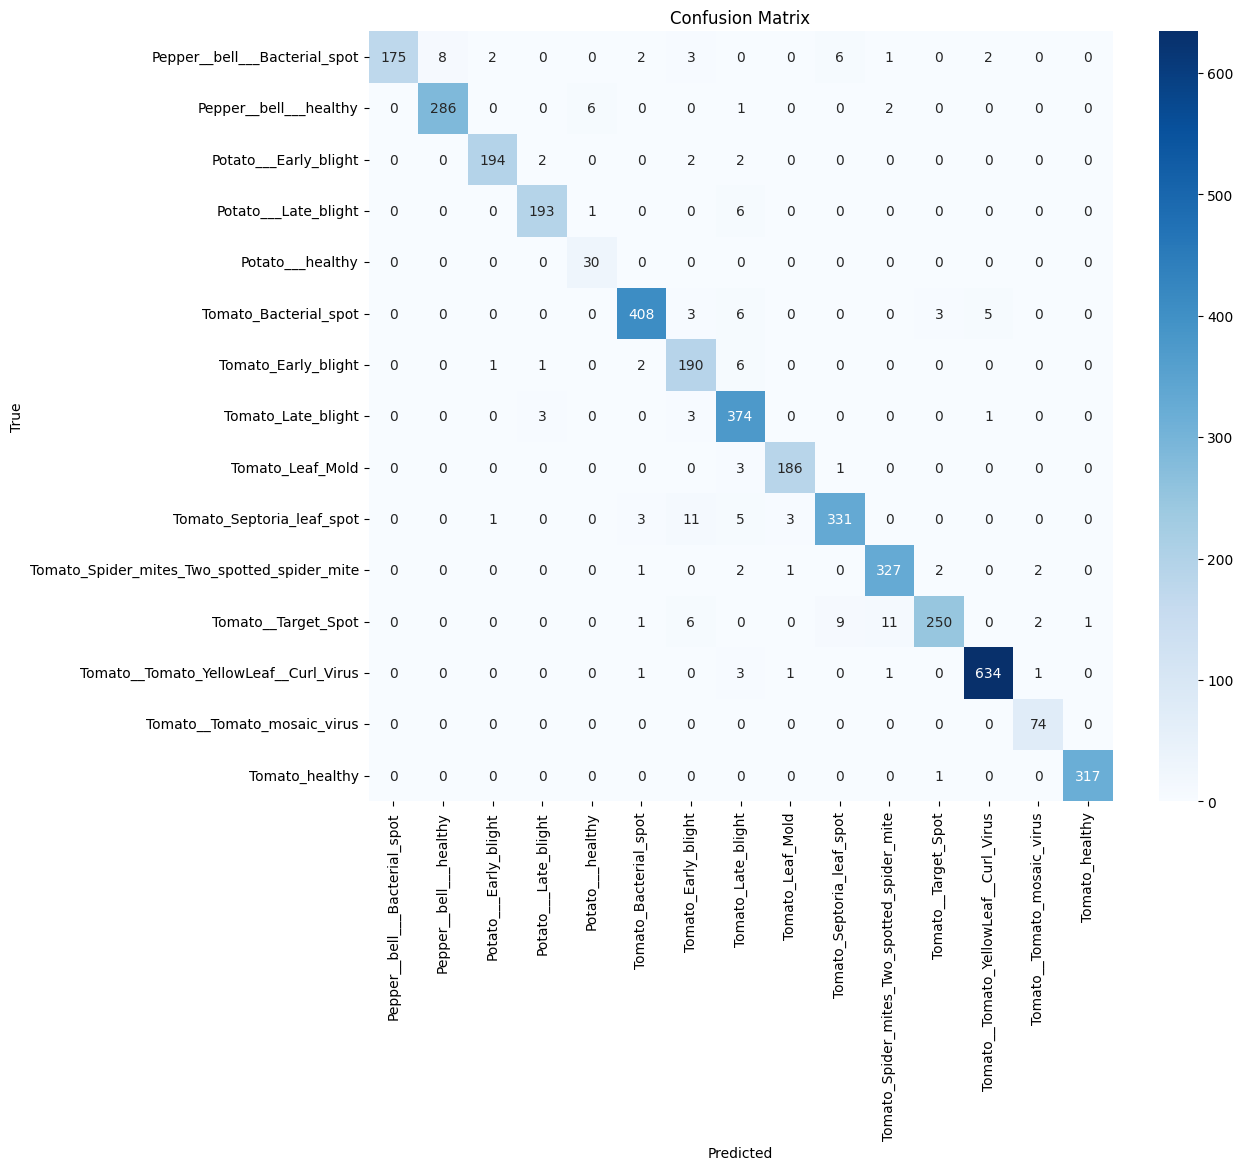

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


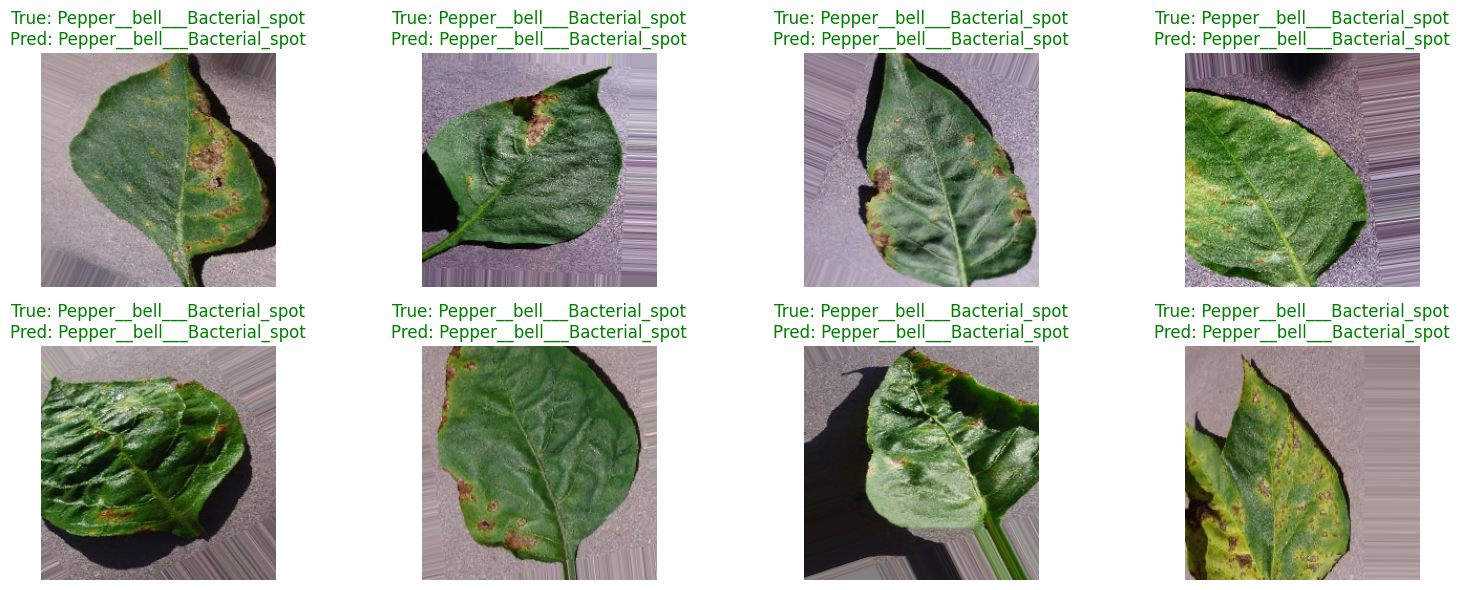

In [1]:
import os, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# === PARAMETERS ===
img_size = 224
batch_size = 32
epochs = 10
path = "/kaggle/input/plantdisease/PlantVillage"

# === DATA GENERATORS ===
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    path, target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='categorical', subset='training', shuffle=True
)
val_gen = datagen.flow_from_directory(
    path, target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='categorical', subset='validation', shuffle=False
)
class_names = list(train_gen.class_indices.keys())
num_classes = len(class_names)

# === CLASS WEIGHTS ===
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(train_gen.classes),
                                     y=train_gen.classes)
class_weights_dict = dict(enumerate(class_weights))

# === MODEL ===
base = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base.trainable = True  # Fine-tune entire model (can freeze first 10 layers if needed)

x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
out = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base.input, outputs=out)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# === TRAIN ===
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, verbose=1)
]

history = model.fit(train_gen, validation_data=val_gen, epochs=epochs,
                    callbacks=callbacks, class_weight=class_weights_dict)

# === EVALUATE ===
val_gen.reset()
y_true = val_gen.classes
y_pred = np.argmax(model.predict(val_gen), axis=1)
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names,
            yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()

# === VISUALIZE PREDICTIONS ===
x_batch, y_batch = next(val_gen)
y_true_batch = np.argmax(y_batch, axis=1)
y_pred_batch = np.argmax(model.predict(x_batch), axis=1)
plt.figure(figsize=(16, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_batch[i])
    true = class_names[y_true_batch[i]]
    pred = class_names[y_pred_batch[i]]
    plt.title(f"True: {true}\nPred: {pred}", color='green' if true==pred else 'red')
    plt.axis('off')
plt.tight_layout(); plt.show()
